Matplotlib is building the font cache; this may take a moment.


(4000, 5)
category
Account Access     1000
Technical Issue    1000
Billing            1000
General Inquiry    1000
Name: count, dtype: int64


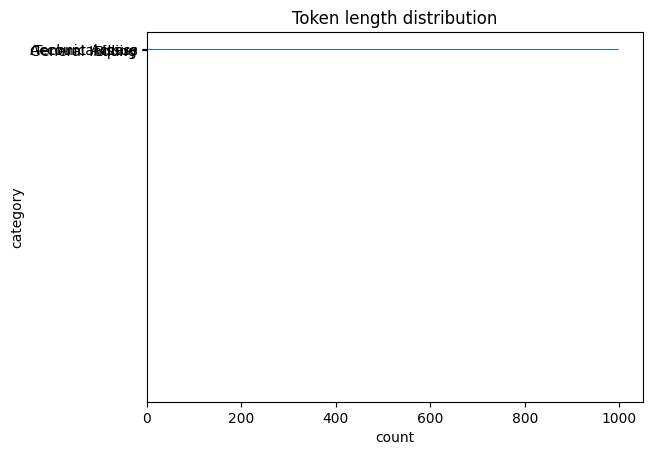

In [3]:
# 01_EDA.ipynb (key cells)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load
df = pd.read_csv('../data/tickets_sample_data.csv')


# quick look
print(df.shape)
print(df['category'].value_counts())


# cleaning example
import re


def clean_text(s):
    s = str(s)
    s = s.lower()
    s = re.sub(r"http\S+", "", s)
    s = re.sub(r"[^a-z0-9\s]", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s


df['text_clean'] = df['text'].apply(clean_text)


# class balance
sns.countplot(y='category', data=df)
plt.title('Category counts')


# token length distribution
df['token_len'] = df['text_clean'].str.split().apply(len)
plt.hist(df['token_len'], bins=30)
plt.title('Token length distribution')


# save cleaned
df.to_csv('../data/tickets_clean.csv', index=False)